In [29]:
%precision 16
%matplotlib inline

import numpy
import math 
import matplotlib.pyplot as plt


### Problem 1

a. Create a program that calculates the p-norm of a vector $\vec{x} \in \mathbb{R}^n$

b. Find explicit formulations for the vectors $\vec{x} \in \mathbb{R}^2$ with a unit p-norm. 

c. With this formula, plot various unit p-norms.

Unit p-norm implies:

case where $p>0$
$$ 1 = ||\mathbf{x}||_p = \Big( \sum_{i=1}^2 |x_i|^p \Big)^{\frac{1}{p}}$$
$$ 1 = \Big( \sum_{i=1}^p |x_i|^2 \Big) = |x_1|^p + |x_2|^p$$
$$ \big( 1 - |x_1|^p \big)^{1/p} = |x_2|$$

case where $p = \infty$
$$ 1 = \max_{1 \leq i \leq 2} |x_i|$$ 

$$ |x_1| = +1, -1 ~ \text{and} ~ |x_2| = t ~~ \text{OR} ~~ |x_1| = t ~ \text{and} ~ |x_2| =  +1, -1  $$
$$ t \in \mathbb{R} ~ s.t. ~ 0 \leq |t| \leq 1 $$

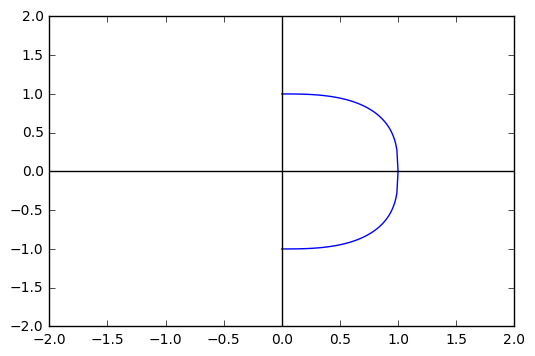

In [125]:
def graph2D_UnitPNorm(p):
    ''' if p is infinity then p = -1'''
    arrSize = 100
    fig = plt.figure()
    axes = fig.add_subplot(1,1,1)
    
    if p != -1 and p > 0:
        x_pos = numpy.linspace(0,1, arrSize)
        x_neg = -1 * x_pos
        
        y_pos = (1.-x_pos**p)**(1./p)
        y_neg = -(1.-x_pos**p)**(1./p)
        
        # plot
        axes.plot(x_pos, y_pos, 'b')
        axes.plot(x_pos, y_neg, 'b')
    
    elif p == -1:
        x_neg = -1*numpy.ones(arrSize)
        x_pos = numpy.ones(arrSize)
        y_0 = numpy.linspace(-1, 1, arrSize)
        
        x_0 = numpy.linspace(-1,1, arrSize)
        y_neg = -1 * numpy.ones(arrSize)
        y_pos = numpy.ones(arrSize)
        
        axes.plot(x_neg, y_0, 'b')
        axes.plot(x_pos, y_0, 'b')
        axes.plot(x_0, y_neg, 'b')
        axes.plot(x_0, y_pos, 'b')
    
    #plot x and y axes
    axes.plot(numpy.zeros(100), numpy.linspace(-2,2,100), 'k')
    axes.plot(numpy.linspace(-2,2,100), numpy.zeros(100), 'k')
    

graph2D_UnitPNorm(2.8)

In [70]:
def calc_pNorm(vec, p=1):
    ''' This function determines the p norm
        for a given a vector.  
        For an infinite p norm, let p = -1'''
    # determine dimension of the given vector
    dim = vec.shape[0]
    norm = 0.0
    if p != -1 and p > 0:
        for i in range(dim):
            norm += abs(vec[i])**p
    
        return norm**(1.0/p)

    # calculate the infinite norm        
    elif p == -1:
        norm = abs(vec[0])
        for i in range(dim):
            if abs(vec[i]) > norm:
                norm = abs(vec[i])
        
        return norm**(1.0/p)
    

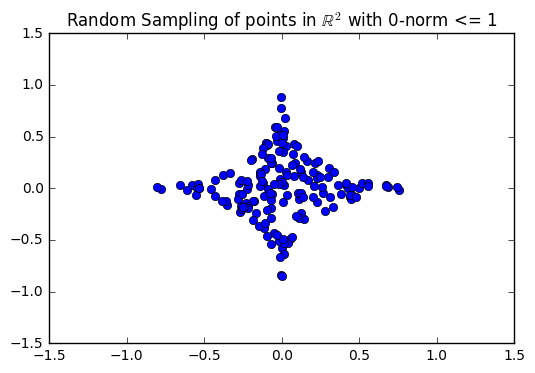

In [71]:
dim = 2
numVectors = 1000
p = .5
pNorms = numpy.empty([numVectors])

vectors = numpy.ones([dim, numVectors])
for i in range(numVectors):
    vectors[:, i] = numpy.array([numpy.random.uniform(-1, 1),numpy.random.uniform(-1,1)])
    #numpy.linspace(-10, 10, numVectors)

for i in range(vectors.shape[1]):
    vector = vectors[:, i]
    pNorms[i] = calc_pNorm(vector, p)

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.set_xlim(-1.5, 1.5)
axes.set_ylim(-1.5, 1.5)
axes.set_title("Random Sampling of points in $\mathbb{R}^2$ with %d-norm <= 1" % p  )
for i in range(numVectors):
    if pNorms[i] <= 1:
        axes.plot(vectors[0,i], vectors[1,i], 'bo')
plt.show()

### Problem 2
Given a real $2 \times 2$ matrix, plot the singular vecors v1 and v2 in the unit circle and also the left singular vectors u1 and u2 in the appropriate ellipse.


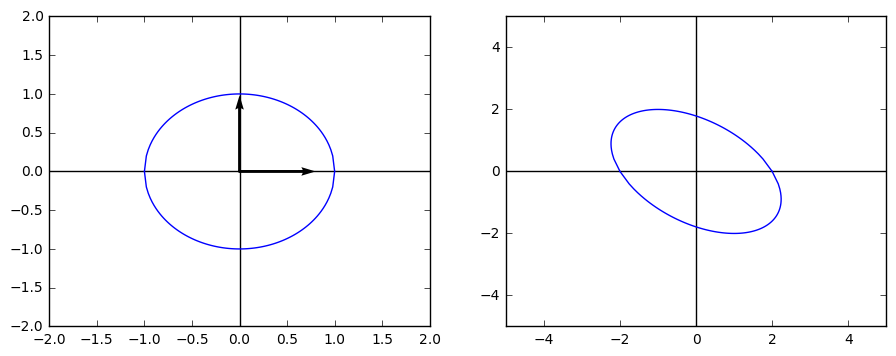

In [224]:
A = numpy.array([[2, 1], [0, -2]])

origin = numpy.array([0, 0])
origin = numpy.transpose(origin)

# Singular Vectors 
v1 = numpy.array([1, 0])
v1 = numpy.transpose(v1)
v2 = numpy.array([0, 1])
v2 = numpy.transpose(v2)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 1.8)

# Plot of unit circle and the Singular Vectors
axes1 = fig.add_subplot(1,2, 1)
axes1.set_xlim(-2,2)
axes1.set_ylim(-2,2)

#plot x and y axes
axes1.plot(numpy.zeros(100), numpy.linspace(-2,2,100), 'k')
axes1.plot(numpy.linspace(-2,2,100), numpy.zeros(100), 'k')

# plot unit circle and singular vectors
data_pos = numpy.empty([2, 100])
data_pos[0,:] = numpy.linspace(-1,1, 100)
data_pos[1,:] = (1-data_pos[0, :]**2)**.5

data_neg = numpy.empty([2, 100])
data_neg[0,:] = numpy.linspace(-1,1, 100)
data_neg[1,:] = -(1-data_neg[0, :]**2)**.5

axes1.plot(data_neg[0,:], data_neg[1,:], 'b')
axes1.plot(data_pos[0,:], data_pos[1,:], 'b')


plt.quiver(0, 0, [0,0], [1,0], scale = 5)
plt.quiver(0, 0, [0,1], [0,0], scale = 5)


# Plot of transformation under 2 by 2 matrix A 
dataA_pos = numpy.empty(data_pos.shape)
dataA_neg = numpy.empty(data_neg.shape)

for i in range(data_pos.shape[1]):
    dataA_neg[:, i] = numpy.dot(A, data_neg[:, i]) 
    dataA_pos[:, i] = numpy.dot(A, data_pos[:, i]) 

axes2 = fig.add_subplot(1,2,2)
axes2.plot(numpy.zeros(100), numpy.linspace(-100,100,100), 'k')
axes2.plot(numpy.linspace(-100,100,100), numpy.zeros(100), 'k')

axes2.plot(dataA_neg[0,:], dataA_neg[1,:], 'b')
axes2.plot(dataA_pos[0,:], dataA_pos[1,:], 'b')

axes2.set_xlim(-5,5)
axes2.set_ylim(-5,5)

plt.show()